<a href="https://colab.research.google.com/github/Ravi-Poddar26/Feature-Engineering/blob/master/Function_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv',usecols=['Age','Fare','Survived'])
display(df.head())

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
df.sample(4)

,Survived,Age,Fare
87,0,29.699118,8.0500
456,0,65.000000,26.5500
325,1,36.000000,135.6333
769,0,32.000000,8.3625


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [ ]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

/tmp/ipython-input-2172416748.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


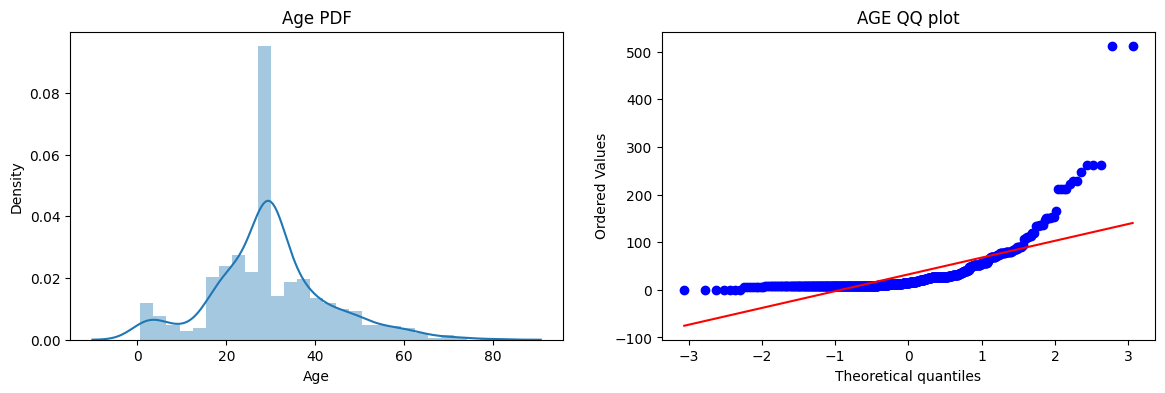

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot = plt)
plt.title('AGE QQ plot')

plt.show()

/tmp/ipython-input-1186035034.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'Fare QQ plot')

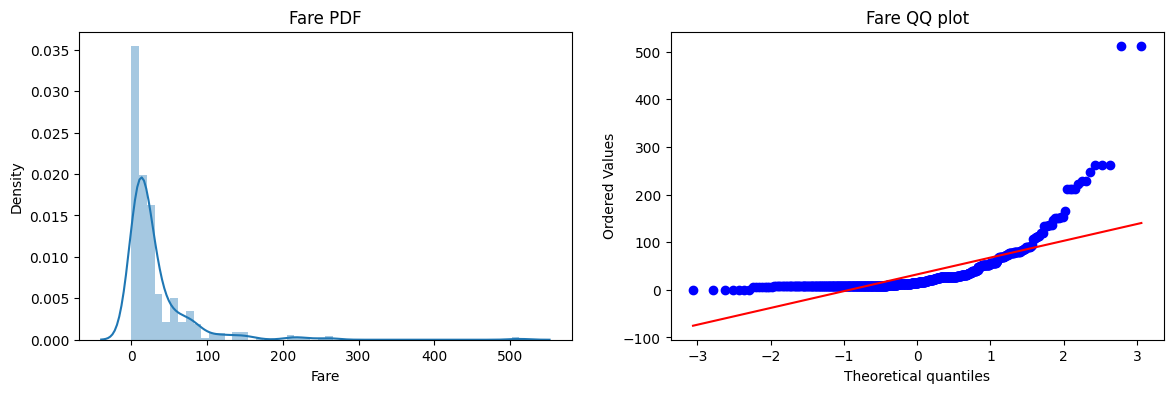

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot = plt)
plt.title('Fare QQ plot')

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred2))

0.6865671641791045
0.6716417910447762


In [ ]:
trf = FunctionTransformer(func = np.log1p)

In [ ]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred2))

0.7126865671641791
0.6828358208955224


In [ ]:
X_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,cv=10,scoring='accuracy')))
print('DT',np.mean(cross_val_score(clf2,X_transformed,y,cv=10,scoring='accuracy')))

LR 0.678027465667915
DT 0.6555056179775282


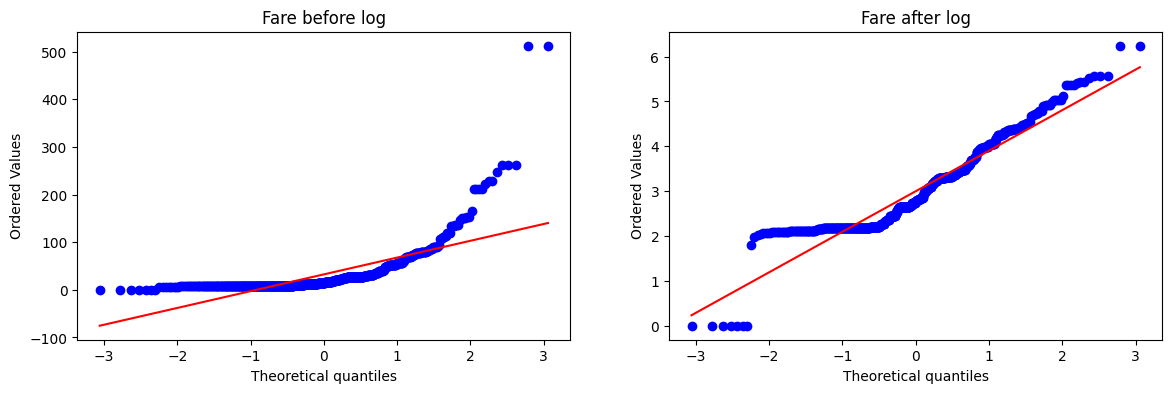

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare after log')

plt.show()

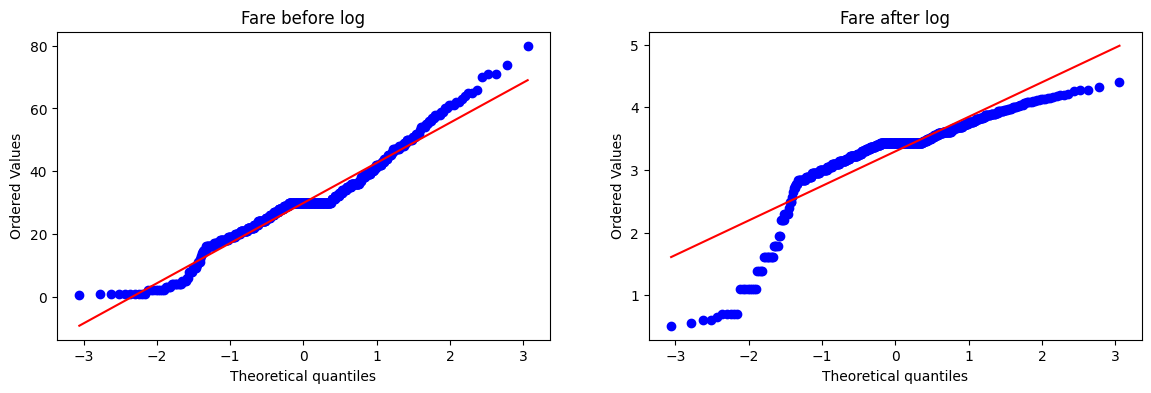

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('age before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('age after log')

plt.show()

In [ ]:
trf2 = ColumnTransformer([
    ('log',FunctionTransformer(func=np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.fit_transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print('Accuracy LR',accuracy_score(y_test,y_pred))
print('Accuracy DR',accuracy_score(y_test,y_pred2))

Accuracy LR 0.6977611940298507
Accuracy DR 0.664179104477612


In [ ]:
def apply_transform(transform):
  x = df.iloc[:,1:3]
  y = df.iloc[:,0]

  trf = ColumnTransformer([
    ('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
  X_trans = trf.fit_transform(x)
  clf = LogisticRegression()
  print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,cv=10,scoring='accuracy')))

  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(x['Fare'], dist='norm', plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(122)
  stats.probplot(X_trans[:,0], dist='norm', plot=plt)
  plt.title('Fare After Transform')

  plt.show()

Accuracy 0.6589013732833957


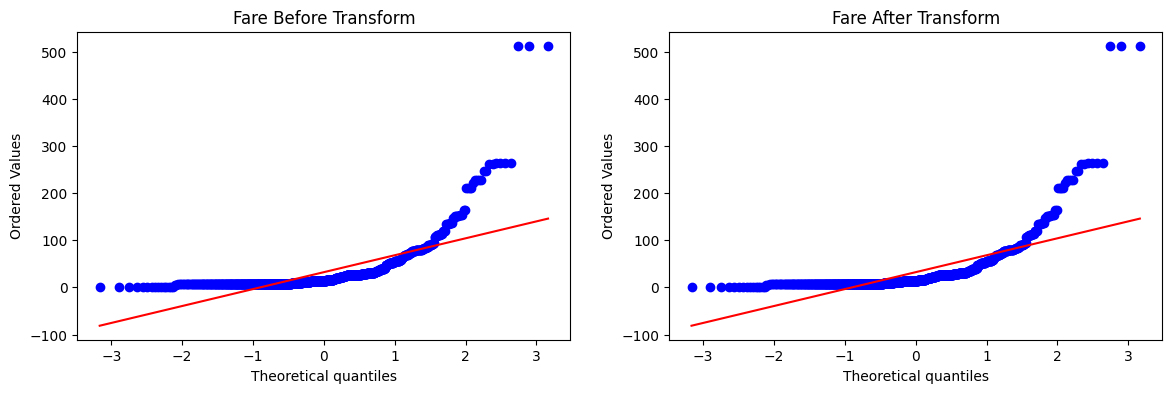

In [ ]:
apply_transform(lambda x:x)

Accuracy 0.6195131086142323


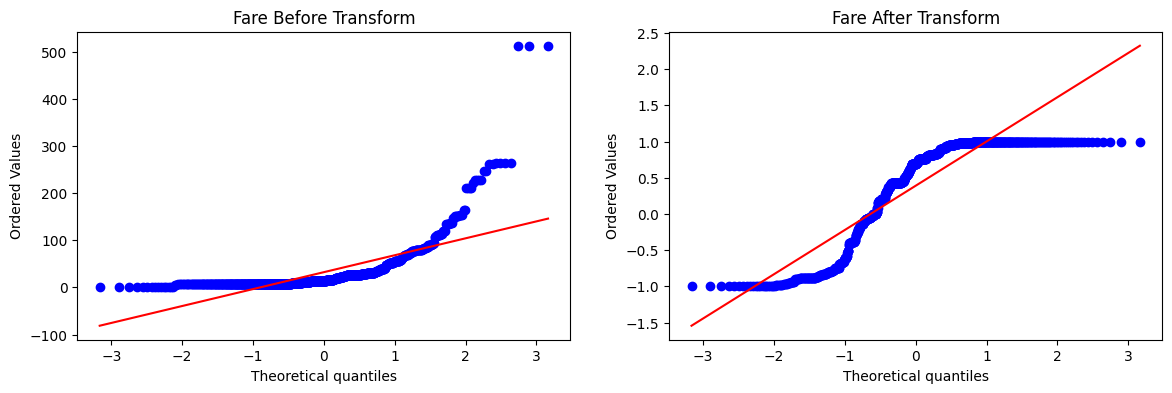

In [ ]:
apply_transform(lambda x:np.sin(x))